# AIS

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import findspark
findspark.init()
import pyspark
pd.set_option('display.max_columns', None)  # Set to display all columns

In [2]:
df_agroFood = pd.read_csv('Agrofood_co2_emission.csv', encoding='latin1')
df_co2Deforest = pd.read_csv('co2-deforestation-for-food.csv', encoding='latin1')
df_foodProduc = pd.read_csv('Food_Production.csv', encoding='latin1')
df_foodEmissions = pd.read_csv('food-emissions-supply-chain.csv', encoding='latin1')
df_ghg = pd.read_csv('ghg-per-kg-poore.csv', encoding='latin1')
df_foodLoss = pd.read_csv('global-food-loss-index.csv', encoding='latin1')
df_globalFood = pd.read_csv('global-food.csv', encoding='latin1')
df_globalFood2 = pd.read_csv('global-food(1).csv', encoding='latin1')
df_waterWithdrawals = pd.read_csv('water-withdrawals-per-kg-poore.csv', encoding='latin1')
df_continents = pd.read_csv('continents2.csv', encoding='latin1')

# 1) Dataset agroFood

In [9]:
df_agroFood.tail()

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Total_emissions,Average Temperature Â°C
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.0,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.9108,1077.2392,317.0744,2585.080847,858.982,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.0,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.9857,1093.3441,332.7759,1227.240253,889.425,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.0,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.0570,1108.5523,348.5107,1127.687805,966.265,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.0,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.9514,1121.3255,327.8209,2485.528399,945.942,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667
6964,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.0,238.7639,76500.2982,10662.4408,213.9211,568.0445,350.2168,16.6754,1134.1634,307.4145,1227.240253,940.420,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.189000


In [10]:
df_agroFood.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2496 entries, 20 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2496 non-null   object 
 1   Year                             2496 non-null   int64  
 2   Savanna fires                    2485 non-null   float64
 3   Forest fires                     2463 non-null   float64
 4   Crop Residues                    2004 non-null   float64
 5   Rice Cultivation                 2496 non-null   float64
 6   Drained organic soils (CO2)      2496 non-null   float64
 7   Pesticides Manufacturing         2496 non-null   float64
 8   Food Transport                   2496 non-null   float64
 9   Forestland                       2320 non-null   float64
 10  Net Forest conversion            2320 non-null   float64
 11  Food Household Consumption       2342 non-null   float64
 12  Food Retail             

<Axes: >

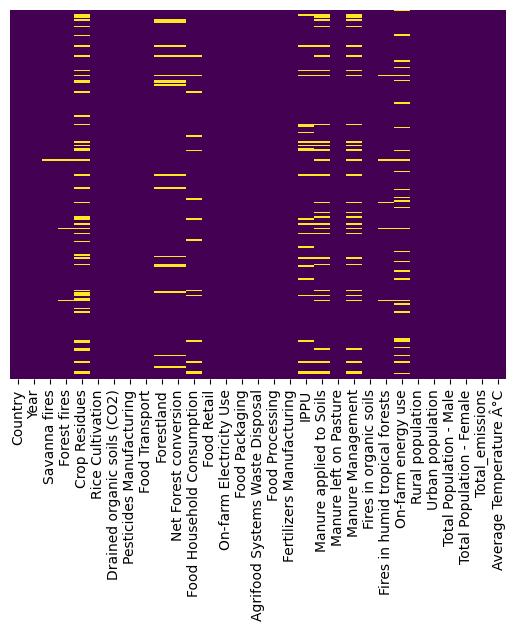

In [11]:
sns.heatmap(df_agroFood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
# Remover dados de anos inferiores a 2010
df_agroFood = df_agroFood[df_agroFood['Year'] >= 2010]
df_agroFood

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Total_emissions,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [13]:
df_agroFood = df_agroFood.rename(columns={'Area': 'Country', 'total_emission': 'Total_emissions'})
df_agroFood

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Total_emissions,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


# Dataset co2Deforest (1 pequeno)

In [14]:
df_co2Deforest

,Entity,Code,Year,total_embodied_emissions
0,Australia,AUS,2013,1.219255e+07
1,Austria,AUT,2013,3.021984e+06
2,Belgium,BEL,2013,1.082760e+07
3,Brazil,BRA,2013,5.447281e+08
4,Bulgaria,BGR,2013,6.481203e+05
5,Canada,CAN,2013,1.282691e+07
6,China,CHN,2013,1.931663e+08
7,Croatia,HRV,2013,5.138495e+05
8,Cyprus,CYP,2013,2.646826e+05
9,Czechia,CZE,2013,2.079429e+06


In [15]:
df_co2Deforest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    44 non-null     object 
 1   Code                      44 non-null     object 
 2   Year                      44 non-null     int64  
 3   total_embodied_emissions  44 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ KB


# dataset foodProduction (1 das comidas)

In [16]:
df_foodProduc.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPOâeq per 1000kcal),Eutrophying emissions per kilogram (gPOâeq per kilogram),Eutrophying emissions per 100g protein (gPOâeq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCOâeq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCOâeq per 100g protein),Land use per 1000kcal (mÂ² per 1000kcal),Land use per kilogram (mÂ² per kilogram),Land use per 100g protein (mÂ² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [17]:
df_foodProduc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [18]:
# make a rename
df_foodProduc = df_foodProduc.rename(columns={"Food product": "Food"})

### tipos de comidas

In [19]:
df_foodProduc["Food"].value_counts().sort_index()

Food
Apples                 1
Bananas                1
Barley (Beer)          1
Beef (beef herd)       1
Beef (dairy herd)      1
Beet Sugar             1
Berries & Grapes       1
Brassicas              1
Cane Sugar             1
Cassava                1
Cheese                 1
Citrus Fruit           1
Coffee                 1
Dark Chocolate         1
Eggs                   1
Fish (farmed)          1
Groundnuts             1
Lamb & Mutton          1
Maize (Meal)           1
Milk                   1
Nuts                   1
Oatmeal                1
Olive Oil              1
Onions & Leeks         1
Other Fruit            1
Other Pulses           1
Other Vegetables       1
Palm Oil               1
Peas                   1
Pig Meat               1
Potatoes               1
Poultry Meat           1
Rapeseed Oil           1
Rice                   1
Root Vegetables        1
Shrimps (farmed)       1
Soybean Oil            1
Soymilk                1
Sunflower Oil          1
Tofu                

In [20]:
# make a rename
df_co2Deforest = df_co2Deforest.rename(columns={"Entity": "Country", "total_embodied_emissions": "Total_emissions_co2"})
to_drop = ["Code"]
df_co2Deforest = df_co2Deforest.drop(to_drop, axis=1)

In [21]:
df_co2Deforest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              44 non-null     object 
 1   Year                 44 non-null     int64  
 2   Total_emissions_co2  44 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


# dataset foodEmissions (2 das comidas)

In [22]:
df_foodEmissions.head()

,Entity,Code,Year,food_emissions_land_use,food_emissions_farm,food_emissions_animal_feed,food_emissions_processing,food_emissions_transport,food_emissions_retail,food_emissions_packaging,food_emissions_losses
0,Apples,NaN,2018,-0.028951,0.225816,0.000000,0.003820,0.095804,0.016578,0.044526,0.070808
1,Bananas,NaN,2018,-0.025534,0.269618,0.000000,0.060146,0.295830,0.020981,0.065670,0.175185
2,Barley,NaN,2018,0.008676,0.176377,0.000000,0.127703,0.035351,0.263587,0.496786,0.070692
3,Beef (beef herd),NaN,2018,23.237536,56.228063,2.680979,1.811083,0.494125,0.233538,0.352084,14.439998
4,Beef (dairy herd),NaN,2018,1.266022,21.915529,3.503673,1.547664,0.592410,0.254032,0.374549,3.847515


In [23]:
# make a rename
df_foodEmissions = df_foodEmissions.rename(columns={"Entity": "Food", "food_emissions_land_use": "FE_land_use", "food_emissions_farm":"FE_farm","food_emissions_animal_feed":"FE_animal_feed","food_emissions_processing":"FE_processing","food_emissions_transport":"FE_transport","food_emissions_retail":"FE_retail","food_emissions_packaging":"FE_packaging","food_emissions_losses":"FE_losses"})
to_drop = ["Code"]
df_foodEmissions = df_foodEmissions.drop(to_drop, axis=1)

In [24]:
df_foodEmissions.head()

,Food,Year,FE_land_use,FE_farm,FE_animal_feed,FE_processing,FE_transport,FE_retail,FE_packaging,FE_losses
0,Apples,2018,-0.028951,0.225816,0.000000,0.003820,0.095804,0.016578,0.044526,0.070808
1,Bananas,2018,-0.025534,0.269618,0.000000,0.060146,0.295830,0.020981,0.065670,0.175185
2,Barley,2018,0.008676,0.176377,0.000000,0.127703,0.035351,0.263587,0.496786,0.070692
3,Beef (beef herd),2018,23.237536,56.228063,2.680979,1.811083,0.494125,0.233538,0.352084,14.439998
4,Beef (dairy herd),2018,1.266022,21.915529,3.503673,1.547664,0.592410,0.254032,0.374549,3.847515


In [25]:
df_foodEmissions["Food"].value_counts().sort_index()

Food
Apples               1
Bananas              1
Barley               1
Beef (beef herd)     1
Beef (dairy herd)    1
Beet Sugar           1
Berries & Grapes     1
Brassicas            1
Cane Sugar           1
Cassava              1
Cheese               1
Citrus Fruit         1
Coffee               1
Dark Chocolate       1
Eggs                 1
Fish (farmed)        1
Groundnuts           1
Lamb & Mutton        1
Maize                1
Milk                 1
Nuts                 1
Oatmeal              1
Olive Oil            1
Onions & Leeks       1
Other Fruit          1
Other Pulses         1
Other Vegetables     1
Palm Oil             1
Peas                 1
Pig Meat             1
Potatoes             1
Poultry Meat         1
Rapeseed Oil         1
Rice                 1
Root Vegetables      1
Shrimps (farmed)     1
Soy milk             1
Soybean Oil          1
Sunflower Oil        1
Tofu                 1
Tomatoes             1
Wheat & Rye          1
Wine                 1
Name: 

# Merge 1
Aqui fazemos o merge dos datasets foodEmissions e foodProduction por tipo de comida

In [26]:
# merge dos datasets df_foodProduc e df_foodEmissions pela Food
df_foodEmiProd = pd.merge(df_foodProduc, df_foodEmissions, on=['Food'], how='left')
df_foodEmiProd = df_foodEmiProd.sort_values(by='Food')
df_foodEmiProd
# Ano ainda é um assunto a discutir, mas por enquanto vou deixar

,Food,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPOâeq per 1000kcal),Eutrophying emissions per kilogram (gPOâeq per kilogram),Eutrophying emissions per 100g protein (gPOâeq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCOâeq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCOâeq per 100g protein),Land use per 1000kcal (mÂ² per 1000kcal),Land use per kilogram (mÂ² per kilogram),Land use per 100g protein (mÂ² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Year,FE_land_use,FE_farm,FE_animal_feed,FE_processing,FE_transport,FE_retail,FE_packaging,FE_losses
27,Apples,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,3.020833,1.45,48.333333,375.208333,6003.333333,180.1,0.895833,14.333333,1.312500,0.63,21.000000,12948.6,431620.000000,26976.250000,2018.0,-0.028951,0.225816,0.000000,0.003820,0.095804,0.016578,0.044526,0.070808
26,Bananas,0.0,0.0,0.3,0.1,0.3,0.1,0.0,0.8,5.483333,3.29,36.555556,190.833333,1272.222222,114.5,1.433333,9.555556,3.216667,1.93,21.444444,661.9,7354.444444,1103.166667,2018.0,-0.025534,0.269618,0.000000,0.060146,0.295830,0.020981,0.065670,0.175185
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6,110.406593,301.41,151.158475,531.575092,727.783350,1451.2,36.439560,49.889669,119.490842,326.21,163.595787,34732.5,17418.505520,12722.527470,2018.0,23.237536,56.228063,2.680979,1.811083,0.494125,0.233538,0.352084,14.439998
34,Beef (dairy herd),0.9,2.5,15.7,1.1,0.4,0.3,0.2,21.1,133.805861,365.29,185.050659,994.249084,1375.025329,2714.3,12.197802,16.869301,15.838828,43.24,21.904762,119805.2,60691.590680,43884.688640,2018.0,1.266022,21.915529,3.503673,1.547664,0.592410,0.254032,0.374549,3.847515
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.541311,5.41,NaN,62.022792,NaN,217.7,0.515670,NaN,0.521368,1.83,NaN,9493.3,NaN,2704.643875,2018.0,0.000052,0.535721,0.000000,0.241885,0.628544,0.039322,0.090289,0.276263
28,Berries & Grapes,0.0,0.0,0.7,0.0,0.2,0.2,0.0,1.1,10.736842,6.12,61.200000,736.140351,4196.000000,419.6,2.684211,15.300000,4.228070,2.41,24.100000,21162.1,211621.000000,37126.491230,2018.0,0.024601,0.717848,0.000000,0.000000,0.236392,0.017057,0.211092,0.324895
23,Brassicas,0.0,0.0,0.3,0.0,0.1,0.0,0.0,0.4,29.470588,5.01,45.545455,702.352941,1085.454545,119.4,3.000000,4.636364,3.235294,0.55,5.000000,8455.1,76864.545450,49735.882350,2018.0,0.002242,0.277745,0.000000,0.000000,0.094641,0.016844,0.045303,0.077781
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.820513,16.92,NaN,176.666667,NaN,620.1,0.911681,NaN,0.581197,2.04,NaN,16438.6,NaN,4683.361823,2018.0,1.263041,0.491270,0.000000,0.037381,0.794510,0.036723,0.084277,0.491722
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,0.69,7.666667,NaN,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN,2018.0,0.589436,0.219994,0.000000,0.000000,0.093597,0.039322,0.044822,0.328504


/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.draw()
/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.draw()


<Axes: >

/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 132 (\x84) missing from current font.
  func(*args, **kwargs)
/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


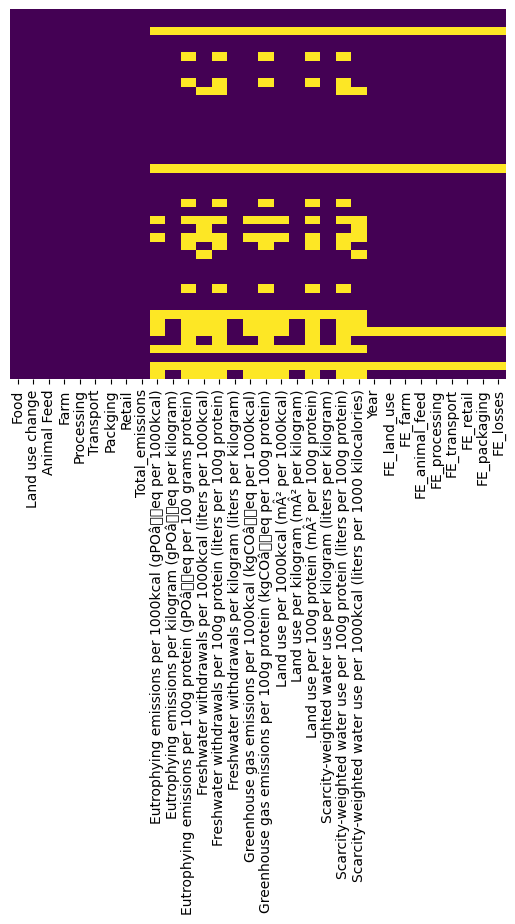

In [27]:
sns.heatmap(df_foodEmiProd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# dataset ghg

In [28]:
df_ghg.head()

,Entity,Code,Year,"GHG emissions per kilogram (Poore & Nemecek, 2018)"
0,Apples,NaN,2010,0.43
1,Bananas,NaN,2010,0.86
2,Barley,NaN,2010,1.18
3,Beef (beef herd),NaN,2010,99.48
4,Beef (dairy herd),NaN,2010,33.30


In [29]:
# make a rename
df_ghg = df_ghg.rename(columns={"Entity": "Food", "GHG emissions per kilogram (Poore & Nemecek, 2018)": "Total_emission_GHG"})
to_drop = ["Code"]
df_ghg = df_ghg.drop(to_drop, axis=1)

In [30]:
df_ghg["Food"].value_counts().sort_index()

Food
Apples               1
Bananas              1
Barley               1
Beef (beef herd)     1
Beef (dairy herd)    1
Beet Sugar           1
Berries & Grapes     1
Brassicas            1
Cane Sugar           1
Cassava              1
Cheese               1
Citrus Fruit         1
Coffee               1
Dark Chocolate       1
Eggs                 1
Fish (farmed)        1
Groundnuts           1
Lamb & Mutton        1
Maize                1
Milk                 1
Nuts                 1
Oatmeal              1
Onions & Leeks       1
Other Fruit          1
Other Pulses         1
Other Vegetables     1
Peas                 1
Pig Meat             1
Potatoes             1
Poultry Meat         1
Prawns (farmed)      1
Rice                 1
Root Vegetables      1
Soy milk             1
Tofu                 1
Tomatoes             1
Wheat & Rye          1
Wine                 1
Name: count, dtype: int64

In [31]:
# rename

df_ghg['Food'] = df_ghg['Food'].replace({'Barley': 'Barley (Beer)','Maize':'Maize (Meal)','Wheat & Rye':'Wheat & Rye (Bread)'})

df_ghg["Food"].value_counts().sort_index()

Food
Apples                 1
Bananas                1
Barley (Beer)          1
Beef (beef herd)       1
Beef (dairy herd)      1
Beet Sugar             1
Berries & Grapes       1
Brassicas              1
Cane Sugar             1
Cassava                1
Cheese                 1
Citrus Fruit           1
Coffee                 1
Dark Chocolate         1
Eggs                   1
Fish (farmed)          1
Groundnuts             1
Lamb & Mutton          1
Maize (Meal)           1
Milk                   1
Nuts                   1
Oatmeal                1
Onions & Leeks         1
Other Fruit            1
Other Pulses           1
Other Vegetables       1
Peas                   1
Pig Meat               1
Potatoes               1
Poultry Meat           1
Prawns (farmed)        1
Rice                   1
Root Vegetables        1
Soy milk               1
Tofu                   1
Tomatoes               1
Wheat & Rye (Bread)    1
Wine                   1
Name: count, dtype: int64

# Merge 2
Aqui fazemos o merge do ghg com o df_foodEmiProd

In [32]:
df2_food = pd.merge(df_ghg, df_foodEmiProd, on=['Food'], how='left')
df2_food = df2_food.sort_values(by='Food')
df2_food

,Food,Year_x,Total_emission_GHG,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPOâeq per 1000kcal),Eutrophying emissions per kilogram (gPOâeq per kilogram),Eutrophying emissions per 100g protein (gPOâeq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCOâeq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCOâeq per 100g protein),Land use per 1000kcal (mÂ² per 1000kcal),Land use per kilogram (mÂ² per kilogram),Land use per 100g protein (mÂ² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Year_y,FE_land_use,FE_farm,FE_animal_feed,FE_processing,FE_transport,FE_retail,FE_packaging,FE_losses
0,Apples,2010,0.43,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,3.020833,1.45,48.333333,375.208333,6003.333333,180.1,0.895833,14.333333,1.312500,0.63,21.000000,12948.6,431620.000000,26976.250000,2018.0,-0.028951,0.225816,0.000000,0.003820,0.095804,0.016578,0.044526,0.070808
1,Bananas,2010,0.86,0.0,0.0,0.3,0.1,0.3,0.1,0.0,0.8,5.483333,3.29,36.555556,190.833333,1272.222222,114.5,1.433333,9.555556,3.216667,1.93,21.444444,661.9,7354.444444,1103.166667,2018.0,-0.025534,0.269618,0.000000,0.060146,0.295830,0.020981,0.065670,0.175185
2,Barley (Beer),2010,1.18,0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Beef (beef herd),2010,99.48,16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6,110.406593,301.41,151.158475,531.575092,727.783350,1451.2,36.439560,49.889669,119.490842,326.21,163.595787,34732.5,17418.505520,12722.527470,2018.0,23.237536,56.228063,2.680979,1.811083,0.494125,0.233538,0.352084,14.439998
4,Beef (dairy herd),2010,33.30,0.9,2.5,15.7,1.1,0.4,0.3,0.2,21.1,133.805861,365.29,185.050659,994.249084,1375.025329,2714.3,12.197802,16.869301,15.838828,43.24,21.904762,119805.2,60691.590680,43884.688640,2018.0,1.266022,21.915529,3.503673,1.547664,0.592410,0.254032,0.374549,3.847515
5,Beet Sugar,2010,1.81,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.541311,5.41,NaN,62.022792,NaN,217.7,0.515670,NaN,0.521368,1.83,NaN,9493.3,NaN,2704.643875,2018.0,0.000052,0.535721,0.000000,0.241885,0.628544,0.039322,0.090289,0.276263
6,Berries & Grapes,2010,1.53,0.0,0.0,0.7,0.0,0.2,0.2,0.0,1.1,10.736842,6.12,61.200000,736.140351,4196.000000,419.6,2.684211,15.300000,4.228070,2.41,24.100000,21162.1,211621.000000,37126.491230,2018.0,0.024601,0.717848,0.000000,0.000000,0.236392,0.017057,0.211092,0.324895
7,Brassicas,2010,0.51,0.0,0.0,0.3,0.0,0.1,0.0,0.0,0.4,29.470588,5.01,45.545455,702.352941,1085.454545,119.4,3.000000,4.636364,3.235294,0.55,5.000000,8455.1,76864.545450,49735.882350,2018.0,0.002242,0.277745,0.000000,0.000000,0.094641,0.016844,0.045303,0.077781
8,Cane Sugar,2010,3.20,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.820513,16.92,NaN,176.666667,NaN,620.1,0.911681,NaN,0.581197,2.04,NaN,16438.6,NaN,4683.361823,2018.0,1.263041,0.491270,0.000000,0.037381,0.794510,0.036723,0.084277,0.491722
9,Cassava,2010,1.32,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,0.69,7.666667,NaN,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN,2018.0,0.589436,0.219994,0.000000,0.000000,0.093597,0.039322,0.044822,0.328504


/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.draw()
/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.draw()


<Axes: >

/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 132 (\x84) missing from current font.
  func(*args, **kwargs)
/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


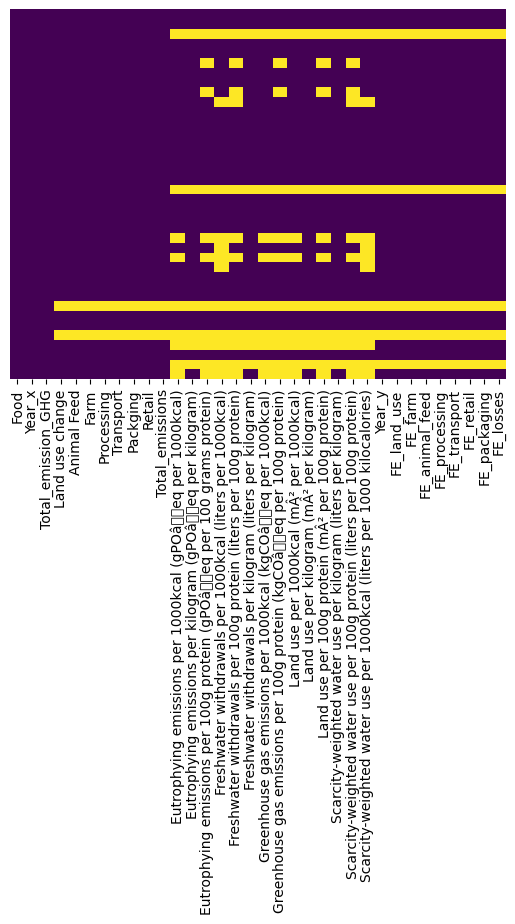

In [33]:
sns.heatmap(df2_food.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
# drop dos alimentos que têm mais NaN
#to_drop = ["Code"]
#df_ghg = df_ghg.drop(to_drop, axis=1)
df2_food = df2_food.drop(2)
df2_food = df2_food.drop(18)
df2_food = df2_food.drop(25)
df2_food = df2_food.drop(30)
df2_food = df2_food.drop(33)
df2_food = df2_food.drop(34)
df2_food = df2_food.drop(36)
df2_food

,Food,Year_x,Total_emission_GHG,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPOâeq per 1000kcal),Eutrophying emissions per kilogram (gPOâeq per kilogram),Eutrophying emissions per 100g protein (gPOâeq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCOâeq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCOâeq per 100g protein),Land use per 1000kcal (mÂ² per 1000kcal),Land use per kilogram (mÂ² per kilogram),Land use per 100g protein (mÂ² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Year_y,FE_land_use,FE_farm,FE_animal_feed,FE_processing,FE_transport,FE_retail,FE_packaging,FE_losses
0,Apples,2010,0.43,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,3.020833,1.45,48.333333,375.208333,6003.333333,180.1,0.895833,14.333333,1.312500,0.63,21.000000,12948.6,431620.000000,26976.250000,2018.0,-0.028951,0.225816,0.000000,0.003820,0.095804,0.016578,0.044526,0.070808
1,Bananas,2010,0.86,0.0,0.0,0.3,0.1,0.3,0.1,0.0,0.8,5.483333,3.29,36.555556,190.833333,1272.222222,114.5,1.433333,9.555556,3.216667,1.93,21.444444,661.9,7354.444444,1103.166667,2018.0,-0.025534,0.269618,0.000000,0.060146,0.295830,0.020981,0.065670,0.175185
3,Beef (beef herd),2010,99.48,16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6,110.406593,301.41,151.158475,531.575092,727.783350,1451.2,36.439560,49.889669,119.490842,326.21,163.595787,34732.5,17418.505520,12722.527470,2018.0,23.237536,56.228063,2.680979,1.811083,0.494125,0.233538,0.352084,14.439998
4,Beef (dairy herd),2010,33.30,0.9,2.5,15.7,1.1,0.4,0.3,0.2,21.1,133.805861,365.29,185.050659,994.249084,1375.025329,2714.3,12.197802,16.869301,15.838828,43.24,21.904762,119805.2,60691.590680,43884.688640,2018.0,1.266022,21.915529,3.503673,1.547664,0.592410,0.254032,0.374549,3.847515
5,Beet Sugar,2010,1.81,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.541311,5.41,NaN,62.022792,NaN,217.7,0.515670,NaN,0.521368,1.83,NaN,9493.3,NaN,2704.643875,2018.0,0.000052,0.535721,0.000000,0.241885,0.628544,0.039322,0.090289,0.276263
6,Berries & Grapes,2010,1.53,0.0,0.0,0.7,0.0,0.2,0.2,0.0,1.1,10.736842,6.12,61.200000,736.140351,4196.000000,419.6,2.684211,15.300000,4.228070,2.41,24.100000,21162.1,211621.000000,37126.491230,2018.0,0.024601,0.717848,0.000000,0.000000,0.236392,0.017057,0.211092,0.324895
7,Brassicas,2010,0.51,0.0,0.0,0.3,0.0,0.1,0.0,0.0,0.4,29.470588,5.01,45.545455,702.352941,1085.454545,119.4,3.000000,4.636364,3.235294,0.55,5.000000,8455.1,76864.545450,49735.882350,2018.0,0.002242,0.277745,0.000000,0.000000,0.094641,0.016844,0.045303,0.077781
8,Cane Sugar,2010,3.20,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.820513,16.92,NaN,176.666667,NaN,620.1,0.911681,NaN,0.581197,2.04,NaN,16438.6,NaN,4683.361823,2018.0,1.263041,0.491270,0.000000,0.037381,0.794510,0.036723,0.084277,0.491722
9,Cassava,2010,1.32,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,0.69,7.666667,NaN,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN,2018.0,0.589436,0.219994,0.000000,0.000000,0.093597,0.039322,0.044822,0.328504
10,Cheese,2010,23.88,4.5,2.3,13.1,0.7,0.1,0.2,0.3,21.2,25.418605,98.37,44.551630,1448.372093,2538.586957,5605.2,6.170543,10.815217,22.684755,87.79,39.759964,180850.6,81906.974640,46731.421190,2018.0,4.467476,13.095539,2.353058,0.740386,0.138557,0.333338,0.172091,2.577137


# dataset waterWithdrawals

In [35]:
df_waterWithdrawals.head()

,Entity,Code,Year,"Freshwater withdrawals per kilogram (Poore & Nemecek, 2018)"
0,Apples,NaN,2010,180.1
1,Bananas,NaN,2010,114.5
2,Barley,NaN,2010,17.1
3,Beef (beef herd),NaN,2010,1451.2
4,Beef (dairy herd),NaN,2010,2714.3


In [36]:
# make a rename
df_waterWithdrawals = df_waterWithdrawals.rename(columns={"Entity": "Food", "Freshwater withdrawals per kilogram (Poore & Nemecek, 2018)": "Freshwater_withdrawals_per_Kg"})
to_drop = ["Code"]
df_waterWithdrawals = df_waterWithdrawals.drop(to_drop, axis=1)

In [38]:
#df_waterWithdrawals["Food"].value_counts().sort_index()
df_waterWithdrawals['Food'] = df_waterWithdrawals['Food'].replace({'Barley': 'Barley (Beer)','Maize':'Maize (Meal)','Wheat & Rye':'Wheat & Rye (Bread)'})

df_ghg["Food"].value_counts().sort_index()

Food
Apples                 1
Bananas                1
Barley (Beer)          1
Beef (beef herd)       1
Beef (dairy herd)      1
Beet Sugar             1
Berries & Grapes       1
Brassicas              1
Cane Sugar             1
Cassava                1
Cheese                 1
Citrus Fruit           1
Coffee                 1
Dark Chocolate         1
Eggs                   1
Fish (farmed)          1
Groundnuts             1
Lamb & Mutton          1
Maize (Meal)           1
Milk                   1
Nuts                   1
Oatmeal                1
Onions & Leeks         1
Other Fruit            1
Other Pulses           1
Other Vegetables       1
Peas                   1
Pig Meat               1
Potatoes               1
Poultry Meat           1
Prawns (farmed)        1
Rice                   1
Root Vegetables        1
Soy milk               1
Tofu                   1
Tomatoes               1
Wheat & Rye (Bread)    1
Wine                   1
Name: count, dtype: int64

# Merge 3

In [39]:
df3_food = pd.merge(df2_food, df_waterWithdrawals, on=['Food'], how='left')
df3_food = df3_food.sort_values(by='Food')
df3_food

,Food,Year_x,Total_emission_GHG,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPOâeq per 1000kcal),Eutrophying emissions per kilogram (gPOâeq per kilogram),Eutrophying emissions per 100g protein (gPOâeq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCOâeq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCOâeq per 100g protein),Land use per 1000kcal (mÂ² per 1000kcal),Land use per kilogram (mÂ² per kilogram),Land use per 100g protein (mÂ² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Year_y,FE_land_use,FE_farm,FE_animal_feed,FE_processing,FE_transport,FE_retail,FE_packaging,FE_losses,Year,Freshwater_withdrawals_per_Kg
0,Apples,2010,0.43,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,3.020833,1.45,48.333333,375.208333,6003.333333,180.1,0.895833,14.333333,1.312500,0.63,21.000000,12948.6,431620.000000,26976.250000,2018.0,-0.028951,0.225816,0.000000,0.003820,0.095804,0.016578,0.044526,0.070808,2010,180.1
1,Bananas,2010,0.86,0.0,0.0,0.3,0.1,0.3,0.1,0.0,0.8,5.483333,3.29,36.555556,190.833333,1272.222222,114.5,1.433333,9.555556,3.216667,1.93,21.444444,661.9,7354.444444,1103.166667,2018.0,-0.025534,0.269618,0.000000,0.060146,0.295830,0.020981,0.065670,0.175185,2010,114.5
2,Beef (beef herd),2010,99.48,16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6,110.406593,301.41,151.158475,531.575092,727.783350,1451.2,36.439560,49.889669,119.490842,326.21,163.595787,34732.5,17418.505520,12722.527470,2018.0,23.237536,56.228063,2.680979,1.811083,0.494125,0.233538,0.352084,14.439998,2010,1451.2
3,Beef (dairy herd),2010,33.30,0.9,2.5,15.7,1.1,0.4,0.3,0.2,21.1,133.805861,365.29,185.050659,994.249084,1375.025329,2714.3,12.197802,16.869301,15.838828,43.24,21.904762,119805.2,60691.590680,43884.688640,2018.0,1.266022,21.915529,3.503673,1.547664,0.592410,0.254032,0.374549,3.847515,2010,2714.3
4,Beet Sugar,2010,1.81,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.541311,5.41,NaN,62.022792,NaN,217.7,0.515670,NaN,0.521368,1.83,NaN,9493.3,NaN,2704.643875,2018.0,0.000052,0.535721,0.000000,0.241885,0.628544,0.039322,0.090289,0.276263,2010,217.7
5,Berries & Grapes,2010,1.53,0.0,0.0,0.7,0.0,0.2,0.2,0.0,1.1,10.736842,6.12,61.200000,736.140351,4196.000000,419.6,2.684211,15.300000,4.228070,2.41,24.100000,21162.1,211621.000000,37126.491230,2018.0,0.024601,0.717848,0.000000,0.000000,0.236392,0.017057,0.211092,0.324895,2010,419.6
6,Brassicas,2010,0.51,0.0,0.0,0.3,0.0,0.1,0.0,0.0,0.4,29.470588,5.01,45.545455,702.352941,1085.454545,119.4,3.000000,4.636364,3.235294,0.55,5.000000,8455.1,76864.545450,49735.882350,2018.0,0.002242,0.277745,0.000000,0.000000,0.094641,0.016844,0.045303,0.077781,2010,119.4
7,Cane Sugar,2010,3.20,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.820513,16.92,NaN,176.666667,NaN,620.1,0.911681,NaN,0.581197,2.04,NaN,16438.6,NaN,4683.361823,2018.0,1.263041,0.491270,0.000000,0.037381,0.794510,0.036723,0.084277,0.491722,2010,620.1
8,Cassava,2010,1.32,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,0.69,7.666667,NaN,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN,2018.0,0.589436,0.219994,0.000000,0.000000,0.093597,0.039322,0.044822,0.328504,2010,0.0
9,Cheese,2010,23.88,4.5,2.3,13.1,0.7,0.1,0.2,0.3,21.2,25.418605,98.37,44.551630,1448.372093,2538.586957,5605.2,6.170543,10.815217,22.684755,87.79,39.759964,180850.6,81906.974640,46731.421190,2018.0,4.467476,13.095539,2.353058,0.740386,0.138557,0.333338,0.172091,2.577137,2010,5605.2


/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.draw()
/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.draw()


<Axes: >

/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 132 (\x84) missing from current font.
  func(*args, **kwargs)
/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/catarina/miniconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


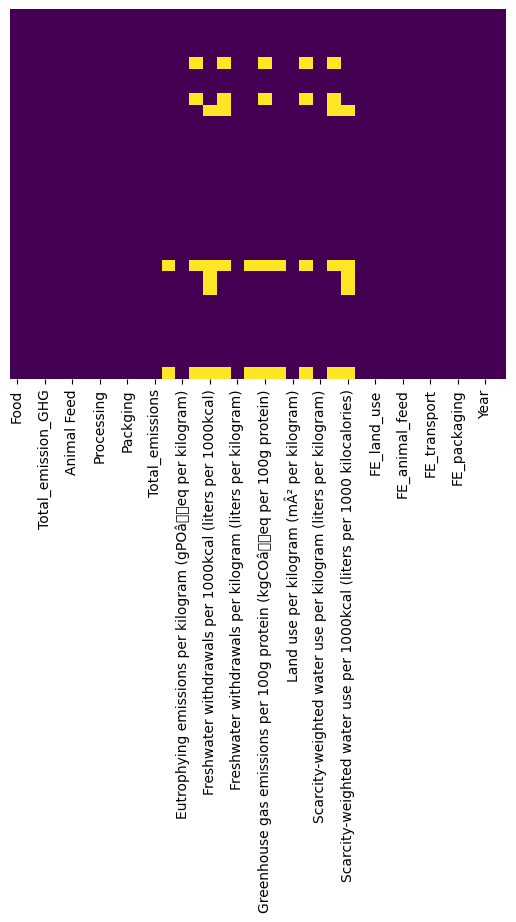

In [41]:
sns.heatmap(df3_food.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Merge 4
aqui fazemos o merge do dataset agroFood e co2Deforest

In [42]:
# merge do df_agroFood e do df_co2Deforest pelo pais
# primeiro merge
df3_agroCO2Deforest= pd.merge(df_agroFood, df_co2Deforest, on=['Country'], how='inner')
df3_agroCO2Deforest

,Country,Year_x,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Total_emissions,Average Temperature Â°C,Year_y,Total_emissions_co2
0,Australia,2010,17618.8264,542.0101,2338.9542,166.971400,2863.8312,1920.0,9360.0330,-41464.6137,68313.3939,11505.3282,7135.3048,1956.0368,14753.9452,5237.6302,7961.7265,664.54280,26586.2630,850.4658,23463.2836,5685.0396,0.0,1.5297,6785.0779,3277772.0,18842292.0,10961285.0,11057883.0,174245.580600,0.554000,2013,1.219255e+07
1,Australia,2011,114616.4011,1083.1693,2693.9505,668.406100,2862.2868,2113.0,9593.6797,-31963.9195,0.0000,11511.3680,7361.5302,1791.7659,7287.5305,5289.5820,9022.6755,710.72780,27274.1850,902.1915,25043.2006,5950.4144,0.0,171.5113,6708.3633,3304468.0,19175331.0,11127505.0,11229529.0,210692.020000,0.219500,2013,1.219255e+07
2,Australia,2012,112381.0135,1675.5378,2897.6757,909.474300,2862.2700,2168.0,9650.1033,-31963.9195,0.0000,11502.3330,7132.4676,1874.6785,5614.4549,5390.5298,8896.5692,725.42570,27407.3782,920.6463,25202.7271,5986.5061,0.0,214.7438,6834.0560,3331639.0,19490210.0,11310830.0,11418439.0,208282.671300,0.438250,2013,1.219255e+07
3,Australia,2013,29147.2144,2839.5764,2420.2907,1002.287200,2860.7299,1958.0,9823.5901,-31963.9195,0.0000,11120.1077,7498.9633,1715.8224,5511.3713,5511.0977,8632.4437,729.74660,27606.5006,932.0787,25783.1462,6059.3181,0.0,133.5757,6938.1280,3356405.0,19794324.0,11496392.0,11615389.0,126260.069200,1.462917,2013,1.219255e+07
4,Australia,2014,51470.4268,2192.0506,2596.4259,676.423400,2857.4043,2109.0,9883.0665,-31963.9195,0.0000,10559.3535,7660.6272,1821.3929,5194.6149,5398.1994,8334.1358,752.01530,28599.8637,933.1938,25331.1290,6074.3825,0.0,183.7297,6891.1429,3379903.0,20094765.0,11665575.0,11804005.0,147554.658600,1.211417,2013,1.219255e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Switzerland,2016,0.0488,0.0000,44.3693,495.646742,824.3224,27.0,2045.5068,-3051.4225,511.0195,482.6313,2359.6071,27.8852,100.2640,1398.6849,2678.2748,565.68241,6522.1556,438.1264,329.6729,1087.2033,0.0,0.0000,465.7415,2206365.0,6195374.0,4147359.0,4225538.0,17352.420452,1.603250,2013,5.229060e+06
403,Switzerland,2017,0.0106,0.0000,57.1009,495.646742,824.1706,26.0,2051.4414,-3051.4225,511.0195,469.5536,2361.9279,28.0169,103.5503,1406.8855,2725.1957,565.68241,6590.4434,436.8908,328.3706,1081.9948,0.0,0.0000,455.4612,2224037.0,6251968.0,4189958.0,4261730.0,17467.940352,1.766250,2013,5.229060e+06
404,Switzerland,2018,0.0000,0.0000,53.0856,495.646742,822.5709,27.0,2078.0475,-3051.4225,511.0195,447.0325,2271.9739,25.3267,97.7447,1413.1271,2672.4804,565.68241,6444.6796,436.4020,327.6436,1078.5629,0.0,0.0000,438.3264,2238762.0,6305272.0,4221914.0,4292520.0,17154.929952,2.504667,2013,5.229060e+06
405,Switzerland,2019,0.0000,0.0000,54.1134,483.789906,806.5261,24.0,2067.9554,-3051.4225,511.0195,444.2281,2056.6472,22.9500,95.5321,1413.0438,2779.4877,565.68241,6114.8229,428.1983,323.8960,1051.3478,0.0,0.0000,436.7279,2251160.0,6357099.0,4253216.0,4322373.0,16628.546016,2.147667,2013,5.229060e+06


<Axes: >

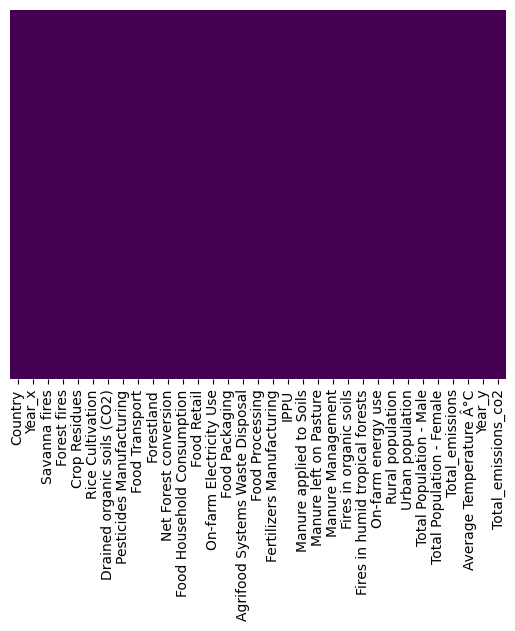

In [43]:
sns.heatmap(df3_agroCO2Deforest.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# dataset foodLoss + continente

In [44]:
df_foodLoss

,Entity,Code,Year,12.3.1 - Global food loss index - AG_FLS_INDEX
0,Central and Southern Asia (UN),NaN,2016,96.76
1,Central and Southern Asia (UN),NaN,2020,94.91
2,Central and Southern Asia (UN),NaN,2021,88.70
3,Eastern and South-Eastern Asia (UN),NaN,2016,99.06
4,Eastern and South-Eastern Asia (UN),NaN,2020,99.48
5,Eastern and South-Eastern Asia (UN),NaN,2021,99.97
6,Europe and Northern America (UN),NaN,2016,99.49
7,Europe and Northern America (UN),NaN,2020,106.53
8,Europe and Northern America (UN),NaN,2021,100.94
9,Latin America and the Caribbean (UN),NaN,2016,99.84


In [45]:
# make a rename
df_foodLoss = df_foodLoss.rename(columns={"Entity": "Region", "12.3.1 - Global food loss index - AG_FLS_INDEX": "Global_food_loss_index"})
to_drop = ["Code"]
df_foodLoss = df_foodLoss.drop(to_drop, axis=1)

In [46]:
df_foodLoss.head()

,Region,Year,Global_food_loss_index
0,Central and Southern Asia (UN),2016,96.76
1,Central and Southern Asia (UN),2020,94.91
2,Central and Southern Asia (UN),2021,88.70
3,Eastern and South-Eastern Asia (UN),2016,99.06
4,Eastern and South-Eastern Asia (UN),2020,99.48


In [47]:
df_foodLoss['Region'] = df_foodLoss['Region'].replace({'Northen Africa (UN)':'Northen Africa', 'Northern America (UN)':'Northern America', 'Sub-Saharan Africa (UN)':'Sub-Saharan Africa', 'Latin America and the Caribbean (UN)':'Latin America and the Caribbean', 'Central and Southern Asia (UN)':'Central and Southern Asia', 'Eastern and South-Eastern Asia (UN)': 'Eastern and South-Eastern Asia', 'Europe and Northern America (UN)':'Europe and Northern America', 'Least Developed Countries (LDCs)':'Least Developed Countries', 'Small Island Developing States (SIDS)':'Small Island Developing States'})
df_foodLoss
#df_foodEmissions['Food'] = df_foodEmissions['Food'].replace({'Ham': 'NewFood'})

,Region,Year,Global_food_loss_index
0,Central and Southern Asia,2016,96.76
1,Central and Southern Asia,2020,94.91
2,Central and Southern Asia,2021,88.70
3,Eastern and South-Eastern Asia,2016,99.06
4,Eastern and South-Eastern Asia,2020,99.48
5,Eastern and South-Eastern Asia,2021,99.97
6,Europe and Northern America,2016,99.49
7,Europe and Northern America,2020,106.53
8,Europe and Northern America,2021,100.94
9,Latin America and the Caribbean,2016,99.84


In [48]:
df_continents.rename(columns={'ï»¿name': 'name'}, inplace=True)
#df_continents
df_continents["sub-region"].value_counts().sort_index()
df_continents['sub-region'] = df_continents['sub-region'].replace({'Central Asia': 'Central and Southern Asia','Southern Asia ':'Central and Southern Asia','Eastern Asia':'Eastern and South-Eastern Asia','South-eastern Asia':'Eastern and South-Eastern Asia','Eastern Europe':'Europe and Northern America','Northern America':'Europe and Northern America',
                                                                     'Southern Europe':'Europe and Northern America','Northern Europe':'Europe and Northern America','Western Europe':'Europe and Northern America'})
#df_ghg["Food"].value_counts().sort_index()
df_continents

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Ã land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Europe and Northern America,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Europe and Northern America,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [49]:
df_continents = df_continents[['name', 'region', 'sub-region', 'intermediate-region']]
df_continents

,name,region,sub-region,intermediate-region
0,Afghanistan,Asia,Southern Asia,NaN
1,Ã land Islands,Europe,Europe and Northern America,NaN
2,Albania,Europe,Europe and Northern America,NaN
3,Algeria,Africa,Northern Africa,NaN
4,American Samoa,Oceania,Polynesia,NaN
...,...,...,...,...
244,Wallis and Futuna,Oceania,Polynesia,NaN
245,Western Sahara,Africa,Northern Africa,NaN
246,Yemen,Asia,Western Asia,NaN
247,Zambia,Africa,Sub-Saharan Africa,Eastern Africa


### *Tratar do dataset de global food*

In [102]:
df_globalFood

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Producing or slaughtered animals,Producing or slaughtered animals per capita,Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Animal feed (t),feed__tonnes__per_capita,Animal feed per capita (kg),Other uses (t),other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,700000.0,0.079635,79.634680,1.4000,NaN,500000.0,0.056882,568.81916,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,700000.0,0.079635,79.634680,403000.0,0.045847,45.846824,210000.0,0.023890,23.890404,NaN,NaN,NaN,70000.0,0.007963,7.963468,45.787930,125.446382,387.08370,10.237346,5.439545
1,NaN,Afghanistan,1962,8969055.0,700000.0,0.078046,78.046130,1.4000,NaN,500000.0,0.055747,557.47233,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,700000.0,0.078046,78.046130,403000.0,0.044932,44.932270,210000.0,0.023414,23.413839,NaN,NaN,NaN,70000.0,0.007805,7.804613,44.879000,122.956163,379.35650,10.029739,5.330847
2,NaN,Afghanistan,1963,9157463.0,713000.0,0.077860,77.859990,1.4260,NaN,500000.0,0.054600,546.00276,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,713000.0,0.077860,77.859990,410000.0,0.044772,44.772226,214000.0,0.023369,23.368917,NaN,NaN,NaN,71000.0,0.007753,7.753239,44.785263,122.699349,378.59918,10.015743,5.324051
3,NaN,Afghanistan,1964,9355510.0,720000.0,0.076960,76.960000,1.4257,NaN,505000.0,0.053979,539.78886,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,720000.0,0.076960,76.960000,415000.0,0.044359,44.358887,216000.0,0.023088,23.087999,NaN,NaN,NaN,72000.0,0.007696,7.696000,44.308723,121.393760,374.53220,9.908746,5.265616
4,NaN,Afghanistan,1965,9565154.0,720000.0,0.075273,75.273220,1.4400,NaN,500000.0,0.052273,522.73072,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,720000.0,0.075273,75.273220,415000.0,0.043387,43.386650,216000.0,0.022582,22.581968,NaN,NaN,NaN,72000.0,0.007527,7.527323,43.336914,118.731270,366.32706,9.688275,5.145301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13396,NaN,Zimbabwe,2017,14751101.0,1532572.0,0.103895,103.895430,1.3933,NaN,1099945.0,0.074567,745.66975,NaN,NaN,335000.0,0.022710,22.710169,2000.0,0.000136,0.135583,1632000.0,0.110636,110.635810,1300000.0,0.088129,88.129014,222000.0,0.015050,15.049724,NaN,NaN,NaN,70000.0,0.004745,4.745408,88.105850,241.385888,698.69900,18.404848,7.518289
13397,NaN,Zimbabwe,2018,15052191.0,1560100.0,0.103646,103.646040,1.3506,NaN,1155075.0,0.076738,767.38000,NaN,NaN,100000.0,0.006644,6.643551,1000.0,0.000066,0.066436,1605000.0,0.106629,106.628990,1300000.0,0.086366,86.366160,192000.0,0.012756,12.755618,NaN,NaN,NaN,71000.0,0.004717,4.716921,86.351590,236.579696,684.82710,18.043474,7.376625
13398,NaN,Zimbabwe,2019,15354606.0,773976.0,0.050407,50.406765,0.7807,NaN,991354.0,0.064564,645.63950,NaN,NaN,77000.0,0.005015,5.014782,1000.0,0.000065,0.065127,1044000.0,0.067993,67.992630,995000.0,0.064801,64.801400,92000.0,0.005992,5.991687,NaN,NaN,NaN,27000.0,0.001758,1.758430,64.802260,177.540437,564.02010,14.860454,6.075808
13399,NaN,Zimbabwe,2020,15669663.0,1202347.0,0.076731,76.730880,1.1801,NaN,1018884.0,0.065023,650.22714,NaN,NaN,1048000.0,0.066881,66.880820,5000.0,0.000319,0.319088,1449000.0,0.092472,92.471674,1147000.0,0.073199,7

In [103]:
df_globalFood = df_globalFood[df_globalFood['Year'] >= 2010]
df_globalFood

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Producing or slaughtered animals,Producing or slaughtered animals per capita,Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Animal feed (t),feed__tonnes__per_capita,Animal feed per capita (kg),Other uses (t),other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
49,NaN,Afghanistan,2010,28189672.0,301000.0,0.010678,10.677669,1.6448,NaN,183000.0,0.006492,64.917393,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,301000.0,0.010678,10.677669,54000.0,0.001916,1.915595,178000.0,0.006314,6.314369,NaN,NaN,NaN,45000.0,0.001596,1.596329,1.905032,5.219267,16.099596,0.424491,0.227776
50,NaN,Afghanistan,2011,29249156.0,300120.0,0.010261,10.260809,1.6400,NaN,183000.0,0.006257,62.565906,NaN,NaN,3000.0,0.000103,0.102567,0.0,0.000000,0.000000,303000.0,0.010359,10.359273,56000.0,0.001915,1.914585,191000.0,0.006530,6.530103,NaN,NaN,NaN,45000.0,0.001539,1.538506,1.925484,5.275299,16.309984,0.432462,0.226528
51,NaN,Afghanistan,2012,30466484.0,310000.0,0.010175,10.175115,2.1986,NaN,141000.0,0.004628,46.280366,NaN,NaN,4000.0,0.000131,0.131292,0.0,0.000000,0.000000,314000.0,0.010306,10.306408,56000.0,0.001838,1.838086,200000.0,0.006565,6.564591,NaN,NaN,NaN,47000.0,0.001543,1.542679,1.830805,5.015904,15.464677,0.409118,0.214787
52,NaN,Afghanistan,2013,31541216.0,312000.0,0.009892,9.891819,2.1972,NaN,142000.0,0.004502,45.020460,NaN,NaN,1000.0,0.000032,0.031705,0.0,0.000000,0.000000,313000.0,0.009924,9.923523,54000.0,0.001712,1.712046,200000.0,0.006341,6.340910,NaN,NaN,NaN,47000.0,0.001490,1.490114,1.698356,4.653029,14.364405,0.378549,0.204621
53,NaN,Afghanistan,2014,32716214.0,316000.0,0.009659,9.658819,2.4882,NaN,127000.0,0.003882,38.818673,NaN,NaN,57000.0,0.001742,1.742255,2000.0,0.000061,0.061132,370000.0,0.011309,11.309377,89000.0,0.002720,2.720364,200000.0,0.006113,6.113177,7000.0,0.000214,0.213961,47000.0,0.001437,1.436597,2.713237,7.433527,22.919716,0.601808,0.326404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13396,NaN,Zimbabwe,2017,14751101.0,1532572.0,0.103895,103.895430,1.3933,NaN,1099945.0,0.074567,745.669750,NaN,NaN,335000.0,0.022710,22.710169,2000.0,0.000136,0.135583,1632000.0,0.110636,110.635810,1300000.0,0.088129,88.129014,222000.0,0.015050,15.049724,NaN,NaN,NaN,70000.0,0.004745,4.745408,88.105850,241.385888,698.699000,18.404848,7.518289
13397,NaN,Zimbabwe,2018,15052191.0,1560100.0,0.103646,103.646040,1.3506,NaN,1155075.0,0.076738,767.380000,NaN,NaN,100000.0,0.006644,6.643551,1000.0,0.000066,0.066436,1605000.0,0.106629,106.628990,1300000.0,0.086366,86.366160,192000.0,0.012756,12.755618,NaN,NaN,NaN,71000.0,0.004717,4.716921,86.351590,236.579696,684.827100,18.043474,7.376625
13398,NaN,Zimbabwe,2019,15354606.0,773976.0,0.050407,50.406765,0.7807,NaN,991354.0,0.064564,645.639500,NaN,NaN,77000.0,0.005015,5.014782,1000.0,0.000065,0.065127,1044000.0,0.067993,67.992630,995000.0,0.064801,64.801400,92000.0,0.005992,5.991687,NaN,NaN,NaN,27000.0,0.001758,1.758430,64.802260,177.540437,564.020100,14.860454,6.075808
13399,NaN,Zimbabwe,2020,15669663.0,1202347.0,0.076731,76.730880,1.1801,NaN,1018884.0,0.065023,650.227140,NaN,NaN,1048000.0,0.066881,66.880820,5000.0,0.000319,0.319088,1449000.0,0.092472,92.471674,1147000.0,

In [104]:
df_globalFood2

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Producing or slaughtered animals,Producing or slaughtered animals per capita,Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Animal feed (t),feed__tonnes__per_capita,Animal feed per capita (kg),Other uses (t),other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,291300.00,0.033139,33.139404,4.2402,NaN,68700.0,0.007816,78.155750,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,370000.0,0.042093,42.092618,329000.0,0.037428,37.428300,NaN,NaN,NaN,NaN,NaN,NaN,41000.0,0.004664,4.664317,37.435070,102.561835,22.410109,1.201997,0.183355
1,NaN,Afghanistan,1962,8969055.0,306300.00,0.034151,34.150753,4.4585,NaN,68700.0,0.007660,76.596700,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,385000.0,0.042925,42.925370,343000.0,0.038243,38.242600,NaN,NaN,NaN,NaN,NaN,NaN,42000.0,0.004683,4.682768,38.192513,104.637021,22.424213,1.233332,0.193664
2,NaN,Afghanistan,1963,9157463.0,324600.00,0.035446,35.446500,4.7249,NaN,68700.0,0.007502,75.020776,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,408000.0,0.044554,44.553824,363000.0,0.039640,39.639800,NaN,NaN,NaN,NaN,NaN,NaN,45000.0,0.004914,4.914025,39.644800,108.615889,23.458462,1.285116,0.193787
3,NaN,Afghanistan,1964,9355510.0,342900.00,0.036652,36.652196,4.6526,NaN,73700.0,0.007878,78.777100,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,431000.0,0.046069,46.069108,383000.0,0.040938,40.938440,NaN,NaN,NaN,NaN,NaN,NaN,48000.0,0.005131,5.130666,40.992203,112.307404,24.491236,1.326609,0.204094
4,NaN,Afghanistan,1965,9565154.0,357500.00,0.037375,37.375250,4.4856,NaN,79700.0,0.008332,83.323280,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000,0.000000,448000.0,0.046837,46.836674,399000.0,0.041714,41.713912,NaN,NaN,NaN,NaN,NaN,NaN,49000.0,0.005123,5.122761,41.683067,114.200182,24.501434,1.347579,0.204179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14057,NaN,Zimbabwe,2017,14751101.0,232628.50,0.015770,15.770247,6.7140,NaN,34648.0,0.002349,23.488416,NaN,NaN,6000.0,0.000407,0.406749,2000.0,0.000136,0.135583,238000.0,0.016134,16.134389,220000.0,0.014914,14.914141,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,0.001356,1.355831,14.882158,40.773035,9.651205,0.569421,0.086861
14058,NaN,Zimbabwe,2018,15052191.0,236034.77,0.015681,15.681090,6.6013,NaN,35756.0,0.002375,23.754681,NaN,NaN,3000.0,0.000199,0.199307,5000.0,0.000332,0.332178,236000.0,0.015679,15.678780,219000.0,0.014549,14.549376,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,0.001329,1.328710,14.570992,39.920526,9.592490,0.556364,0.086332
14059,NaN,Zimbabwe,2019,15354606.0,233508.66,0.015208,15.207727,6.6678,NaN,35020.0,0.002281,22.807490,NaN,NaN,1000.0,0.000065,0.065127,6000.0,0.000391,0.390762,224000.0,0.014588,14.588457,207000.0,0.013481,13.481297,NaN,NaN,NaN,NaN,NaN,NaN,19000.0,0.001237,1.237414,13.496497,36.976704,9.538160,0.524599,0.076305
14060,NaN,Zimbabwe,2020,15669663.0,234587.97,0.014971,14.970837,6.5932,NaN,35580.0,0.002271,22.706296,NaN,NaN,1000.0,0.000064,0.063818,6000.0,0.000383,0.382905,223000.0,0.014231,14.231321,207000.0,0.013210,13.210240,NaN,NaN,NaN,NaN,NaN,NaN,19000.0,0.001213,1.212534,13.212823,36.199515,9.485156,0.512198,0.075881


In [105]:
df_globalFood2 = df_globalFood2[df_globalFood2['Year'] >= 2010]
df_globalFood2

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (mÂ²),Producing or slaughtered animals,Producing or slaughtered animals per capita,Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Animal feed (t),feed__tonnes__per_capita,Animal feed per capita (kg),Other uses (t),other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
49,NaN,Afghanistan,2010,28189672.0,969763.10,0.034401,34.401360,10.670199,NaN,90885.0,0.003224,32.240532,NaN,NaN,10000.0,0.000355,0.354740,149000.0,0.005286,5.285624,1438000.0,0.051012,51.011592,1271000.0,0.045087,45.087434,NaN,NaN,NaN,NaN,NaN,NaN,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
50,NaN,Afghanistan,2011,29249156.0,762948.50,0.026084,26.084462,10.309299,NaN,74006.0,0.002530,25.301927,NaN,NaN,127000.0,0.004342,4.342006,73000.0,0.002496,2.495799,1274000.0,0.043557,43.556813,1146000.0,0.039181,39.180618,NaN,NaN,NaN,NaN,NaN,NaN,129000.0,0.004410,4.410384,39.178970,107.339643,24.712097,1.081154,0.175044
51,NaN,Afghanistan,2012,30466484.0,817743.50,0.026841,26.840758,10.229700,NaN,79938.0,0.002624,26.238014,NaN,NaN,97000.0,0.003184,3.183827,28000.0,0.000919,0.919043,1301000.0,0.042703,42.702664,1174000.0,0.038534,38.534150,NaN,NaN,NaN,NaN,NaN,NaN,127000.0,0.004169,4.168515,38.538956,105.586180,24.547106,1.104620,0.184103
52,NaN,Afghanistan,2013,31541216.0,790266.94,0.025055,25.055056,10.026000,NaN,78821.0,0.002499,24.989840,NaN,NaN,122000.0,0.003868,3.867955,37000.0,0.001173,1.173068,1231000.0,0.039028,39.028298,1117000.0,0.035414,35.413980,NaN,NaN,NaN,NaN,NaN,NaN,117000.0,0.003709,3.709432,35.419920,97.040876,22.508327,1.053799,0.173928
53,NaN,Afghanistan,2014,32716214.0,973721.60,0.029763,29.762663,9.740900,NaN,99962.0,0.003055,30.554270,NaN,NaN,323000.0,0.009873,9.872780,68000.0,0.002078,2.078480,1792000.0,0.054774,54.774065,1630000.0,0.049822,49.822390,NaN,NaN,NaN,NaN,NaN,NaN,167000.0,0.005105,5.104503,49.817490,136.486273,33.660465,1.560622,0.265204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14057,NaN,Zimbabwe,2017,14751101.0,232628.50,0.015770,15.770247,6.714000,NaN,34648.0,0.002349,23.488416,NaN,NaN,6000.0,0.000407,0.406749,2000.0,0.000136,0.135583,238000.0,0.016134,16.134389,220000.0,0.014914,14.914141,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,0.001356,1.355831,14.882158,40.773035,9.651205,0.569421,0.086861
14058,NaN,Zimbabwe,2018,15052191.0,236034.77,0.015681,15.681090,6.601300,NaN,35756.0,0.002375,23.754681,NaN,NaN,3000.0,0.000199,0.199307,5000.0,0.000332,0.332178,236000.0,0.015679,15.678780,219000.0,0.014549,14.549376,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,0.001329,1.328710,14.570992,39.920526,9.592490,0.556364,0.086332
14059,NaN,Zimbabwe,2019,15354606.0,233508.66,0.015208,15.207727,6.667800,NaN,35020.0,0.002281,22.807490,NaN,NaN,1000.0,0.000065,0.065127,6000.0,0.000391,0.390762,224000.0,0.014588,14.588457,207000.0,0.013481,13.481297,NaN,NaN,NaN,NaN,NaN,NaN,19000.0,0.001237,1.237414,13.496497,36.976704,9.538160,0.524599,0.076305
14060,NaN,Zimbabwe,2020,15669663.0,234587.97,0.014971,14.970837,6.593200,NaN,35580.0,0.002271,22.706296,NaN,NaN,1000.0,0.000064,0.063818,6000.0,0.000383,0.382905,223000.0,0.014231,14.231321,207000.0,0.013210,13.210240,NaN,NaN,NaN,NaN,NaN,NaN,19000.0,0.001213,1.212534,13.212823,36.199

# Data Preperation

## Years and Countries